In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python2_7/bin/python


In [3]:
import Nio
import glob

In [4]:
import netCDF4
ds_Y =[]
for iy in np.arange(1979, 2017):
    print iy
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/('+
           np.str(iy)+
          ')/VALUES/time/(Apr-Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/')
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_allpr = xr.concat(ds_Y, dim='time')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [5]:
ds_Y =[]
for iy in np.arange(1979, 2017):
    print iy
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.air2m/time/('+
           np.str(iy)+
          ')/VALUES/time/(Apr-Sep)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/')
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_allTemp = xr.concat(ds_Y, dim='time')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [6]:
ds_allpr.merge(ds_allTemp, inplace=True)

<xarray.Dataset>
Dimensions:  (lat: 11, lon: 14, time: 6954)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 261.0 262.0 263.0 264.0 ...
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 37.0 38.0 39.0 40.0 41.0 ...
  * time     (time) datetime64[ns] 1979-04-01T12:00:00 1979-04-02T12:00:00 ...
Data variables:
    apcp     (time, lat, lon) float32 0.0172432 0.000446335 0.00994562 ...
    air2m    (time, lat, lon) float32 290.377 290.789 291.53 292.395 293.319 ...
Attributes:
    Conventions:  IRIDL

In [7]:
week1 = ds_allpr.stack(MSll=('lat','lon','time'))


In [8]:
week1

<xarray.Dataset>
Dimensions:  (MSll: 1070916)
Coordinates:
  * MSll     (MSll) MultiIndex
  - lat      (MSll) float64 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 32.0 ...
  - lon      (MSll) float64 257.0 257.0 257.0 257.0 257.0 257.0 257.0 257.0 ...
  - time     (MSll) datetime64[ns] 1979-04-01T12:00:00 1979-04-02T12:00:00 ...
Data variables:
    apcp     (MSll) float32 0.0172432 0.000145301 0.00293407 0.000927959 ...
    air2m    (MSll) float32 290.377 287.796 285.835 285.115 290.012 292.133 ...
Attributes:
    Conventions:  IRIDL

In [9]:
week1.coords['MSll'] = np.arange(0,538384) 

ValueError: conflicting sizes for dimension 'MSll': length 538384 on 'MSll' and length 1070916 on u'apcp'

(array([  5.40000000e+01,   7.54000000e+02,   4.50800000e+03,
          1.78590000e+04,   5.06860000e+04,   1.08936000e+05,
          1.88076000e+05,   1.33767000e+05,   3.12660000e+04,
          2.47800000e+03]),
 array([ 280.0958252 ,  283.16256409,  286.22930298,  289.29604187,
         292.36278076,  295.42951965,  298.49625854,  301.56299744,
         304.62973633,  307.69647522,  310.76321411]),
 <a list of 10 Patch objects>)

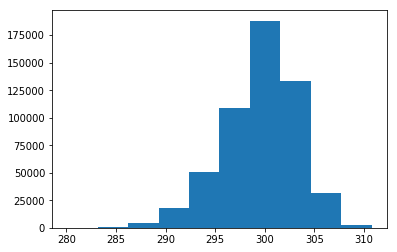

In [22]:
plt.hist(week1.air2m.values.ravel())

In [23]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.air2m)


(array([  8.00000000e+00,   3.90000000e+01,   2.43000000e+02,
          0.00000000e+00,   1.12200000e+03,   3.10800000e+03,
          8.11800000e+03,   0.00000000e+00,   1.77830000e+04,
          3.36040000e+04,   5.64880000e+04,   0.00000000e+00,
          8.81430000e+04,   1.24756000e+05,   1.17856000e+05,
          0.00000000e+00,   6.07280000e+04,   2.10740000e+04,
          4.91800000e+03,   3.96000000e+02]),
 array([ 280. ,  281.5,  283. ,  284.5,  286. ,  287.5,  289. ,  290.5,
         292. ,  293.5,  295. ,  296.5,  298. ,  299.5,  301. ,  302.5,
         304. ,  305.5,  307. ,  308.5,  310. ]),
 <a list of 20 Patch objects>)

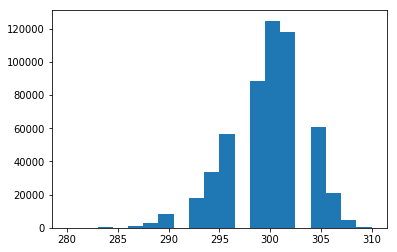

In [24]:
plt.hist(week1.tasb.values.ravel(),bins=20)

In [25]:
week1

<xarray.Dataset>
Dimensions:  (MSll: 538384)
Coordinates:
  * MSll     (MSll) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Data variables:
    apcp     (MSll) float32 4.70275 0.278592 0.17536 0.0996123 0.00129894 ...
    air2m    (MSll) float32 295.91 292.388 294.835 298.256 298.46 299.127 ...
    tasb     (MSll) float32 296.0 292.0 294.0 298.0 298.0 300.0 302.0 302.0 ...
Attributes:
    Conventions:  IRIDL

In [26]:
# templevels = np.arange(274-2.5,331+2.5,5)
grouped1 = week1[['apcp','tasb']].groupby('tasb')
grouped1

In [49]:
ds_group = grouped1.max()
ds_group

<xarray.Dataset>
Dimensions:  (tasb: 16)
Coordinates:
  * tasb     (tasb) float64 280.0 282.0 284.0 286.0 288.0 290.0 292.0 294.0 ...
Data variables:
    apcp     (tasb) float64 2.081 2.335 4.17 5.376 7.593 7.14 9.354 9.763 ...

In [50]:
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group

<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 16)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 288.0 290.0 292.0 ...
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 99.1 99.5 99.9 99.95 ...
Data variables:
    apcp       (tasb) float64 2.081 2.335 4.17 5.376 7.593 7.14 9.354 9.763 ...

In [51]:
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((9,16))) 

In [52]:
ds_group

<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 16)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 288.0 290.0 292.0 ...
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 99.1 99.5 99.9 99.95 ...
Data variables:
    apcp       (tasb) float64 2.081 2.335 4.17 5.376 7.593 7.14 9.354 9.763 ...
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [56]:
for iim, (k, gp) in enumerate(grouped1):
    if gp.apcp.shape[0]>1000:
        print iim,gp.apcp.shape[0]
        var = np.nanpercentile(gp.apcp.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
    #         ind_x = xr.DataArray([0, iim], dims=['x'])
        print var
        ds_group['pr_q'].loc[dict(tasb=k)] = var
    else:
        ds_group['pr_q'].loc[dict(tasb=k)] = np.nan
ds_group


3 1122
[ 0.83110788  1.34405782  2.54415113  3.69692777  3.70465478  4.04010512
  4.78796744  5.05440037  5.31166132]
4 3108
[ 0.43256112  0.9593305   2.38859094  4.48882117  4.56193392  5.45453094
  7.01194619  7.14532787  7.49348394]
5 8118
[ 0.26504634  0.68034565  1.81688792  3.65494921  3.76014765  4.21473157
  5.38022916  5.72968258  6.1642516 ]
6 17783
[ 0.25768961  0.67314038  1.82923465  3.58017535  3.69389954  4.44821422
  6.24561255  6.55882736  7.54434   ]
7 33604
[ 0.2877676   0.7462945   2.01740314  3.95648631  4.06149484  4.685972
  6.35959699  7.2996972   9.21306043]
8 56488
[ 0.4556376   0.97902092  2.28554773  4.31736999  4.4219917   5.088918
  7.05220464  7.76131073  9.78352914]
9 88143
[ 0.61255279  1.17051566  2.52949209  4.60845906  4.73241079  5.42525505
  7.66147424  8.33739673  9.95091494]
10 124756
[ 0.49912378  0.97412035  2.20636576  4.0736712   4.2067696   4.92564063
  6.83001853  7.57595491  9.35722987]
11 117856
[ 0.25135607  0.54201075  1.43858752  3.033

<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 16)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 288.0 290.0 292.0 ...
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 99.1 99.5 99.9 99.95 ...
Data variables:
    apcp       (tasb) float64 2.081 2.335 4.17 5.376 7.593 7.14 9.354 9.763 ...
    pr_q       (quantiles, tasb) float64 nan nan nan 0.8311 0.4326 0.265 ...

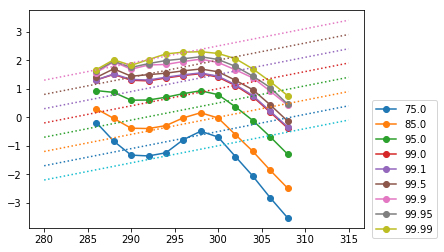

In [57]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-19,-15,0.5):
    plt.plot(np.array([280,315]),iim+0.06*np.array([280,315]),':')


In [171]:

# from dask.distributed import Client, progress
# # HPC
# # client = Client(scheduler_file='/glade/scratch/jhamman/scheduler.json')
# # client

# from dask_kubernetes import KubeCluster
# cluster = KubeCluster(n_workers=20)
# cluster

ImportError: No module named dask_kubernetes

In [201]:
qqq = grouped1.reduce(np.nanpercentile, dim='MSll', q=0.65)

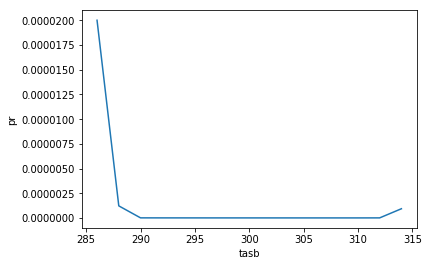

In [202]:
qqq.pr.plot()

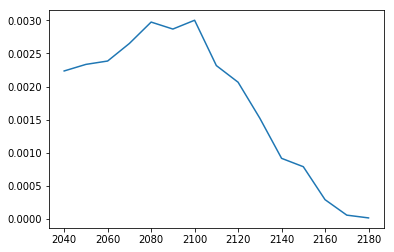

In [147]:
plt.plot(qqq.tasb.values, grouped1.max().pr.values)#